In [1]:
# Read the Growth Inhibition Data: ComboDrugGrowth_Nov2017.csv file
import pandas as pd
        
# Path to your CSV file
csv_file_path = "/nfs/turbo/med-kayvan-lab/Projects/DrugCombination/b-DrugCombination/DC_Data/NCI-ALMANAC/ComboDrugGrowth_Nov2017.csv"

# Read the CSV file
combo_druggrowth_df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify the data has been read correctly
print(combo_druggrowth_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   COMBODRUGSEQ       1048575 non-null  int64  
 1   SCREENER           1048575 non-null  object 
 2   STUDY              1048575 non-null  object 
 3   TESTDATE           1048575 non-null  object 
 4   PLATE              1048575 non-null  object 
 5   PANELNBR           1048575 non-null  int64  
 6   CELLNBR            1048575 non-null  int64  
 7   PREFIX1            1048575 non-null  object 
 8   NSC1               1048575 non-null  int64  
 9   SAMPLE1            1048575 non-null  int64  
 10  CONCINDEX1         1048575 non-null  int64  
 11  CONC1              1048575 non-null  float64
 12  CONCUNIT1          1048575 non-null  object 
 13  PREFIX2            1044918 non-null  object 
 14  NSC2               739881 non-null   float64
 15  SAMPLE2            739881 non-nu

In [2]:
# Define a dictionary mapping PANEL values to PANELACRONYM values
panel_acronym_map = {
    "Breast Cancer": "BR",
    "CNS Cancer": "CNS",
    "Colon Cancer": "CO",
    "Leukemia": "LE",
    "Melanoma": "ME",
    "Non-Small Cell Lung Cancer": "LC",
    "Ovarian Cancer": "OV",
    "Prostate Cancer": "PR",
    "Renal Cancer": "RE"
}

# Apply the mapping to create the PANELACRONYM column
combo_druggrowth_df['PANELACRONYM'] = combo_druggrowth_df['PANEL'].map(panel_acronym_map)

# Print or further process the combo_druggrowth_df as needed
print(combo_druggrowth_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   COMBODRUGSEQ       1048575 non-null  int64  
 1   SCREENER           1048575 non-null  object 
 2   STUDY              1048575 non-null  object 
 3   TESTDATE           1048575 non-null  object 
 4   PLATE              1048575 non-null  object 
 5   PANELNBR           1048575 non-null  int64  
 6   CELLNBR            1048575 non-null  int64  
 7   PREFIX1            1048575 non-null  object 
 8   NSC1               1048575 non-null  int64  
 9   SAMPLE1            1048575 non-null  int64  
 10  CONCINDEX1         1048575 non-null  int64  
 11  CONC1              1048575 non-null  float64
 12  CONCUNIT1          1048575 non-null  object 
 13  PREFIX2            1044918 non-null  object 
 14  NSC2               739881 non-null   float64
 15  SAMPLE2            739881 non-nu

In [3]:
# Add CELLLINENAME column
combo_druggrowth_df['CELLLINENAME'] = combo_druggrowth_df['PANELACRONYM'] + ":" + combo_druggrowth_df['CELLNAME']

# Print or further process the combo_druggrowth_df as needed
print(combo_druggrowth_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   COMBODRUGSEQ       1048575 non-null  int64  
 1   SCREENER           1048575 non-null  object 
 2   STUDY              1048575 non-null  object 
 3   TESTDATE           1048575 non-null  object 
 4   PLATE              1048575 non-null  object 
 5   PANELNBR           1048575 non-null  int64  
 6   CELLNBR            1048575 non-null  int64  
 7   PREFIX1            1048575 non-null  object 
 8   NSC1               1048575 non-null  int64  
 9   SAMPLE1            1048575 non-null  int64  
 10  CONCINDEX1         1048575 non-null  int64  
 11  CONC1              1048575 non-null  float64
 12  CONCUNIT1          1048575 non-null  object 
 13  PREFIX2            1044918 non-null  object 
 14  NSC2               739881 non-null   float64
 15  SAMPLE2            739881 non-nu

In [4]:
combo_druggrowth_df['CELLLINENAME'].value_counts().mean()

17476.25

### Heatmap for drug pairs

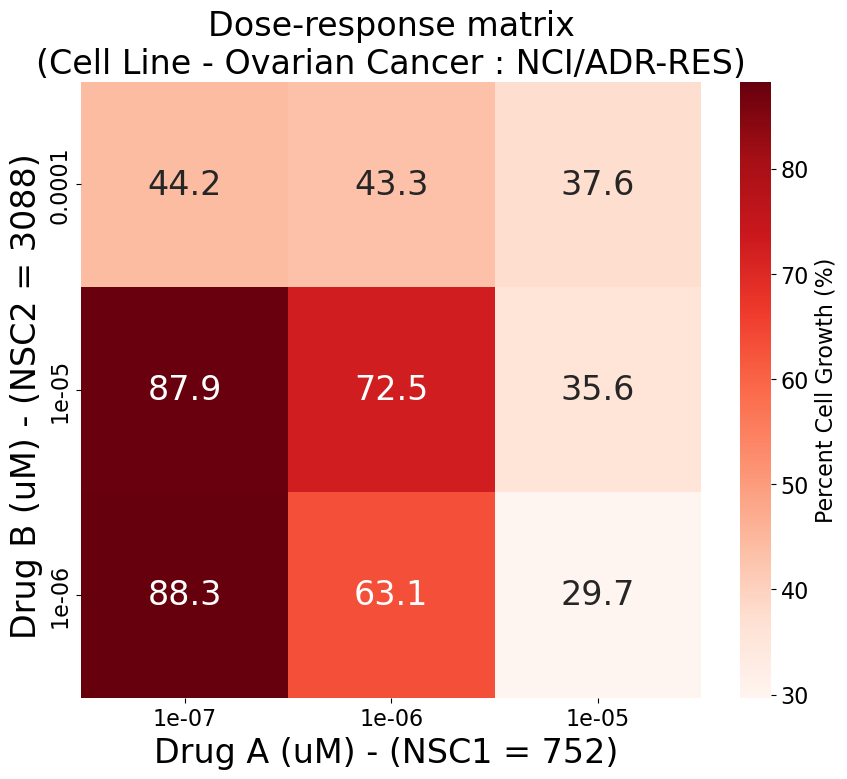

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values
combo_druggrowth_df = combo_druggrowth_df.dropna()

# Convert NSC1 and NSC2 to integers
combo_druggrowth_df['NSC1'] = combo_druggrowth_df['NSC1'].astype(int)
combo_druggrowth_df['NSC2'] = combo_druggrowth_df['NSC2'].astype(int)

# Filter the DataFrame for the specific cell line 'OV:NCI/ADR-RES'
ov_nci_adr_res_df = combo_druggrowth_df[combo_druggrowth_df['CELLLINENAME'] == 'OV:NCI/ADR-RES']

# Filter the DataFrame where NSC1 is equal to the first number in the column and NSC2 is equal to the first number in the column
heatmap_data = ov_nci_adr_res_df[(ov_nci_adr_res_df['NSC1'] == ov_nci_adr_res_df['NSC1'].iloc[0]) & 
                                 (ov_nci_adr_res_df['NSC2'] == ov_nci_adr_res_df['NSC2'].iloc[0])]

# Creating the heatmap with larger font size for annotations
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(heatmap_data.pivot_table(index='CONC2', columns='CONC1', values='PERCENTGROWTH'), 
            annot=True, fmt=".1f", cbar_kws={'label': 'Percent Cell Growth (%)'}, 
            annot_kws={"fontsize":24},  # Adjust fontsize here
            xticklabels='auto', yticklabels='auto', 
            cmap="Reds")

# Accessing the color bar object
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust font size here
cbar.set_label('Percent Cell Growth (%)', fontsize=16)  # Set color bar label and adjust its font size

plt.title(f'Dose-response matrix\n(Cell Line - {heatmap_data["PANEL"].iloc[0]} : {heatmap_data["CELLNAME"].iloc[0]})', fontsize=24)
plt.xlabel(f'Drug A (uM) - (NSC1 = {heatmap_data["NSC1"].iloc[0]}) ', fontsize=24)
plt.ylabel(f'Drug B (uM) - (NSC2 = {heatmap_data["NSC2"].iloc[0]}) ', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Reversing the y-axis labels
plt.gca().invert_yaxis()

plt.show()



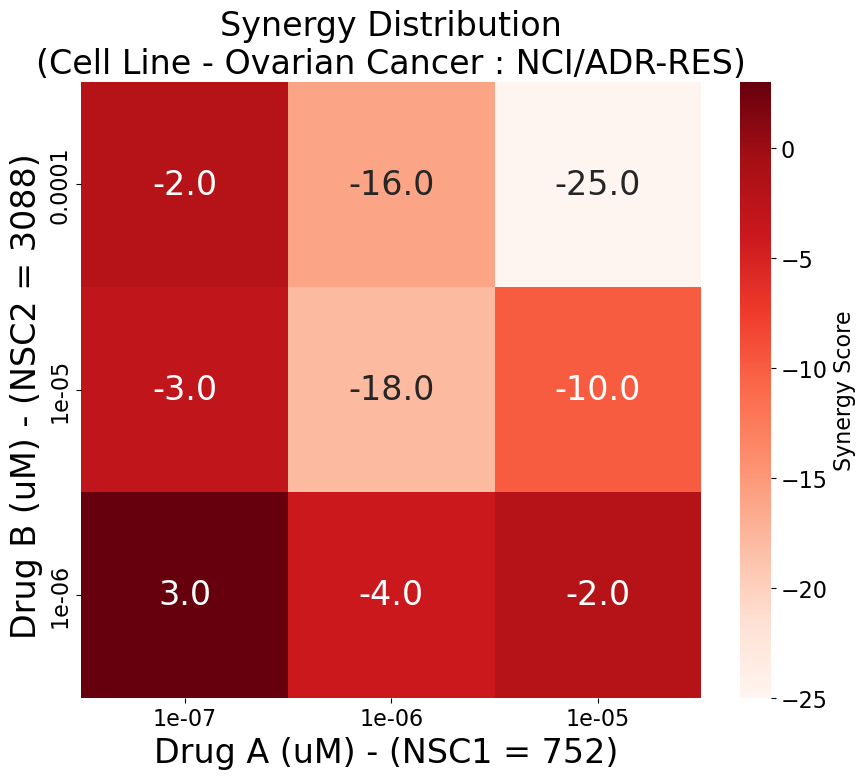

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values
combo_druggrowth_df = combo_druggrowth_df.dropna()

# Convert NSC1 and NSC2 to integers
combo_druggrowth_df['NSC1'] = combo_druggrowth_df['NSC1'].astype(int)
combo_druggrowth_df['NSC2'] = combo_druggrowth_df['NSC2'].astype(int)

# Filter the DataFrame for the specific cell line 'OV:NCI/ADR-RES'
ov_nci_adr_res_df = combo_druggrowth_df[combo_druggrowth_df['CELLLINENAME'] == 'OV:NCI/ADR-RES']

# Filter the DataFrame where NSC1 is equal to the first number in the column and NSC2 is equal to the first number in the column
heatmap_data = ov_nci_adr_res_df[(ov_nci_adr_res_df['NSC1'] == ov_nci_adr_res_df['NSC1'].iloc[0]) & 
                                 (ov_nci_adr_res_df['NSC2'] == ov_nci_adr_res_df['NSC2'].iloc[0])]

# Creating the heatmap with larger font size for annotations
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(heatmap_data.pivot_table(index='CONC2', columns='CONC1', values='SCORE'), 
            annot=True, fmt=".1f", cbar_kws={'label': 'Synergy Score'}, 
            annot_kws={"fontsize":24},  # Adjust fontsize here
            xticklabels='auto', yticklabels='auto', 
            cmap="Reds")

# Accessing the color bar object
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust font size here
cbar.set_label('Synergy Score', fontsize=16)  # Set color bar label and adjust its font size

plt.title(f'Synergy Distribution\n(Cell Line - {heatmap_data["PANEL"].iloc[0]} : {heatmap_data["CELLNAME"].iloc[0]})', fontsize=24)
plt.xlabel(f'Drug A (uM) - (NSC1 = {heatmap_data["NSC1"].iloc[0]}) ', fontsize=24)
plt.ylabel(f'Drug B (uM) - (NSC2 = {heatmap_data["NSC2"].iloc[0]}) ', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Reversing the y-axis labels
plt.gca().invert_yaxis()

plt.show()


### Bar plot for drugs and cell lines

In [20]:
import pandas as pd
import numpy as np

# Create an empty list to store the results
results = []

# Loop through each cell line name
for cell_line_name in combo_druggrowth_df['CELLLINENAME'].unique():
    # Select data for the current cell line
    cell_line_data = combo_druggrowth_df[combo_druggrowth_df['CELLLINENAME'] == cell_line_name]
    
    # For NSC1
    nsc1_unique_concs = cell_line_data.groupby('NSC1')['CONC1'].nunique()
    nsc1_avg_conc1 = round(nsc1_unique_concs.mean(), 2)
    
    # For NSC2
    nsc2_unique_concs = cell_line_data.groupby('NSC2')['CONC2'].nunique()
    nsc2_avg_conc2 = round(nsc2_unique_concs.mean(), 2)
    
    # Append the results to the list
    results.append({
        'CellLineName': cell_line_name,
        '#_of_Drug1': len(nsc1_unique_concs),
        'Avg_#_of_CONC1_for_each_drug_in_drug1': nsc1_avg_conc1,
        '#_of_Drug2': len(nsc2_unique_concs),
        'Avg_#_of_CONC2_for_each_drug_in_drug2': nsc2_avg_conc2
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
# print(results_df.info())
print(results_df['#_of_Drug1'].mean())
print(results_df['#_of_Drug2'].mean())

# Define the index for the x-axis
ind = np.arange(len(results_df))
print(ind)

70.45
61.666666666666664
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


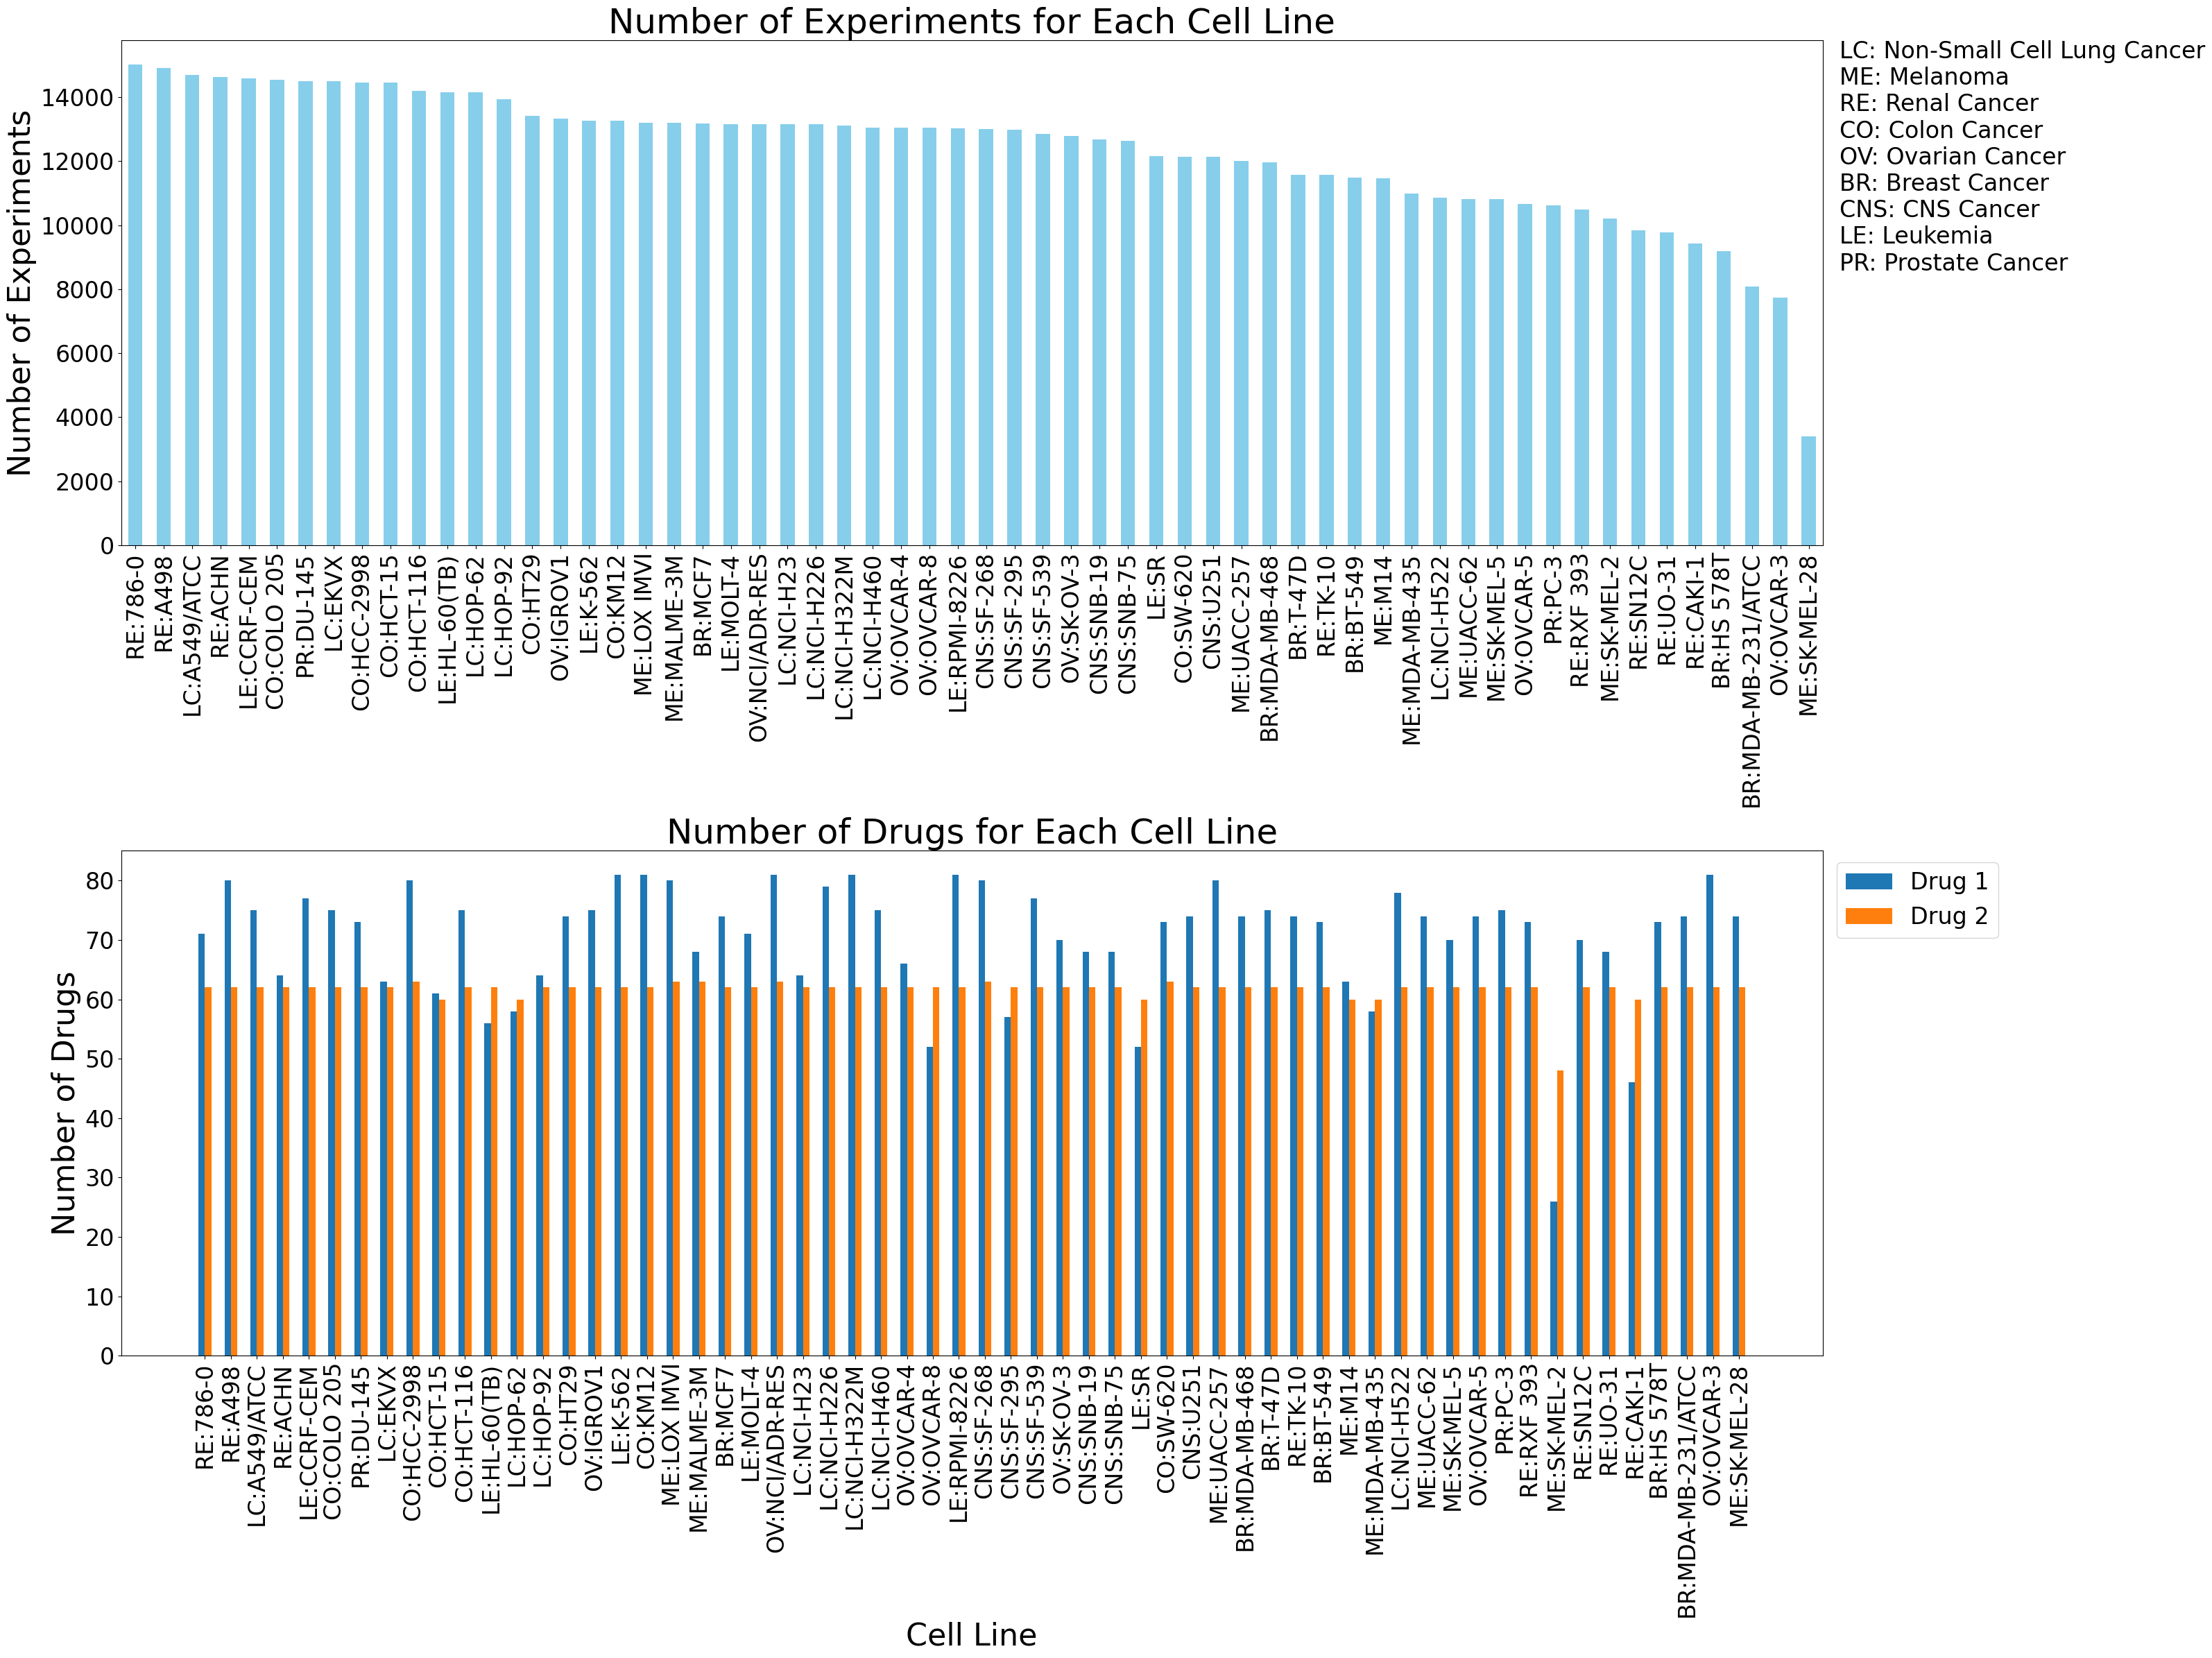

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming combo_druggrowth_df contains your DataFrame with the necessary columns

# Define a dictionary mapping cancer types to their abbreviations
cancer_legend = {
    "LC": "Non-Small Cell Lung Cancer",
    "ME": "Melanoma",
    "RE": "Renal Cancer",
    "CO": "Colon Cancer",
    "OV": "Ovarian Cancer",
    "BR": "Breast Cancer",
    "CNS": "CNS Cancer",
    "LE": "Leukemia",
    "PR": "Prostate Cancer"   
}

# Set the figure size
plt.figure(figsize=(32, 24))

# Define subplot for the count of samples from each cancer type
plt.subplot(2, 1, 1)

# Plot the count of samples from each cancer type
combo_druggrowth_df['CELLLINENAME'].value_counts().plot(kind='bar', color='skyblue')
# plt.xlabel('Cell Line', fontsize=32)
plt.ylabel('Number of Experiments', fontsize=32)
plt.title('Number of Experiments for Each Cell Line', fontsize=36)
plt.xticks(ind, results_df['CellLineName'], rotation=90, fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Add cancer type abbreviations and full names to top right corner
text = "\n".join([f"{abbr}: {name}" for abbr, name in cancer_legend.items()])
plt.text(1.01, 1, text, fontsize=24, ha='left', va='top', transform=plt.gca().transAxes)

# Define subplot for the number of drugs for each cell line
plt.subplot(2, 1, 2)

# Set the width of the bars
bar_width = 0.25

# Define the index for the x-axis
ind = np.arange(len(results_df))

# Plot the number of drugs for each cell line
bars1 = plt.bar(ind - bar_width/2, results_df['#_of_Drug1'], bar_width, label='Drug 1')
bars2 = plt.bar(ind + bar_width/2, results_df['#_of_Drug2'], bar_width, label='Drug 2')

plt.xlabel('Cell Line', fontsize=32)
plt.ylabel('Number of Drugs', fontsize=32)
plt.title('Number of Drugs for Each Cell Line', fontsize=36)
plt.xticks(ind, results_df['CellLineName'], rotation=90, fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Add legend outside the plot area
plt.legend(fontsize=24, loc='upper right', bbox_to_anchor=(1.11, 1))

# Show the plot
plt.tight_layout()
plt.show()

# # Save the figure as a PDF
# plt.savefig("Figure2.pdf")

### Bar plot for showing FNN model's roc and rmse results:

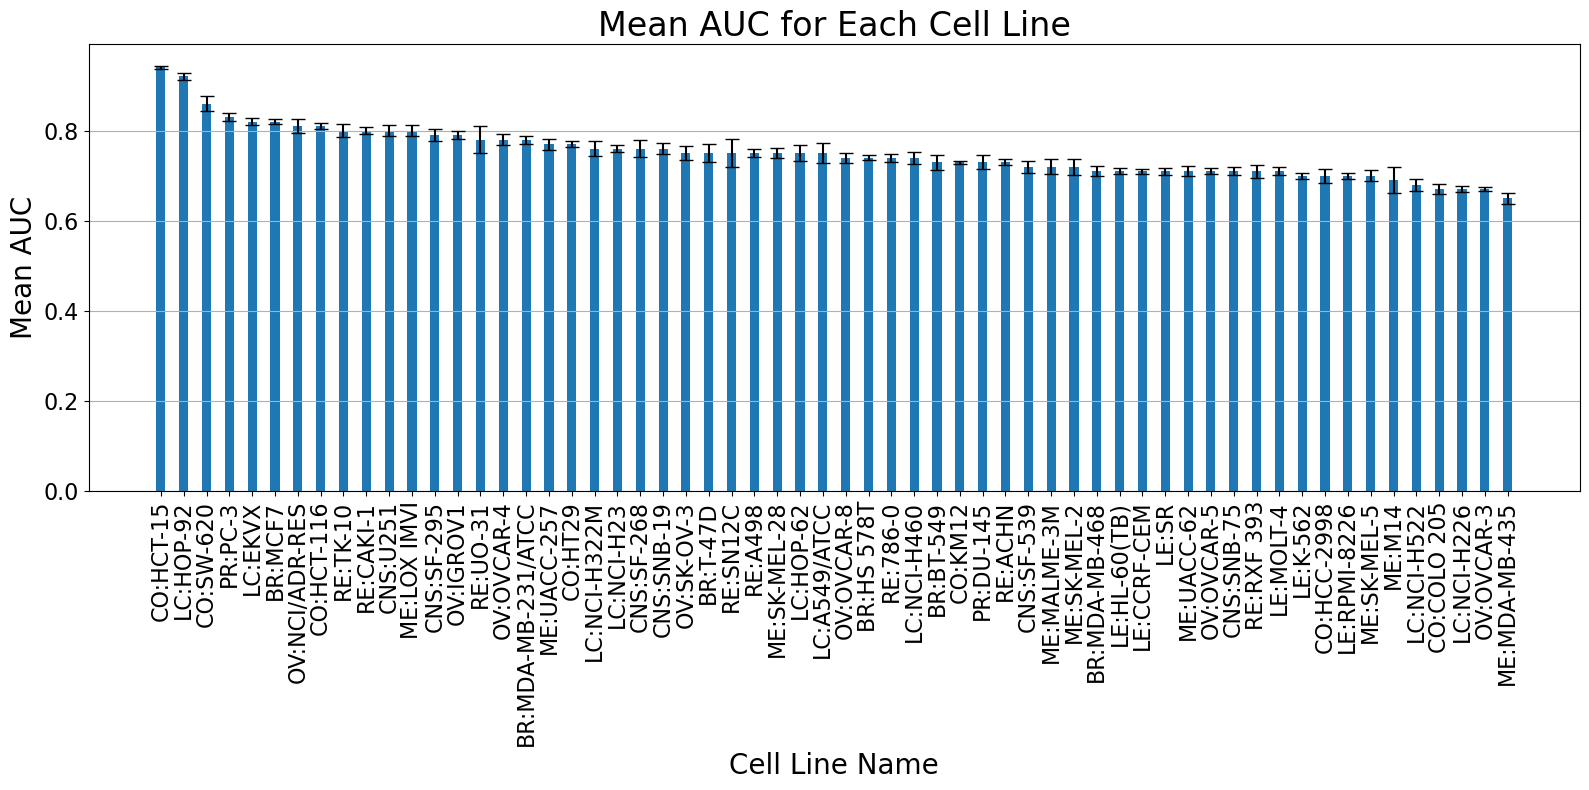

     CellLine  Mean_AUC  Std_AUC
9   CO:HCT-15      0.94   0.0041
13  LC:HOP-92      0.92   0.0075
37  CO:SW-620      0.86   0.0161
50    PR:PC-3      0.83   0.0084
7     LC:EKVX      0.82   0.0076
         CellLine  Mean_AUC  Std_AUC
46    LC:NCI-H522      0.68   0.0134
5     CO:COLO 205      0.67   0.0115
24    LC:NCI-H226      0.67   0.0068
58     OV:OVCAR-3      0.67   0.0043
45  ME:MDA-MB-435      0.65   0.0126


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("rounded_auc_results_TensorFlow.csv")

# Sort the DataFrame by 'Mean_AUC' column in descending order
df = df.sort_values(by='Mean_AUC', ascending=False)

# Define the width of the bars
bar_width = 0.4

# Calculate the position of each bar
positions = range(len(df['CellLine']))

# Plotting
plt.figure(figsize=(16, 8))
plt.bar(positions, df['Mean_AUC'], width=bar_width, yerr=df['Std_AUC'], capsize=5)
plt.xlabel('Cell Line Name', fontsize=20)
plt.ylabel('Mean AUC', fontsize=20)
plt.title('Mean AUC for Each Cell Line', fontsize=24)
plt.xticks(positions, df['CellLine'], rotation=90, fontsize=16)
plt.grid(axis='y')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

# # Save the figure as a PDF
# plt.savefig("Figure4.pdf")

print(df.sort_values(by='Mean_AUC', ascending=False).head())
print(df.sort_values(by='Mean_AUC', ascending=False).tail())

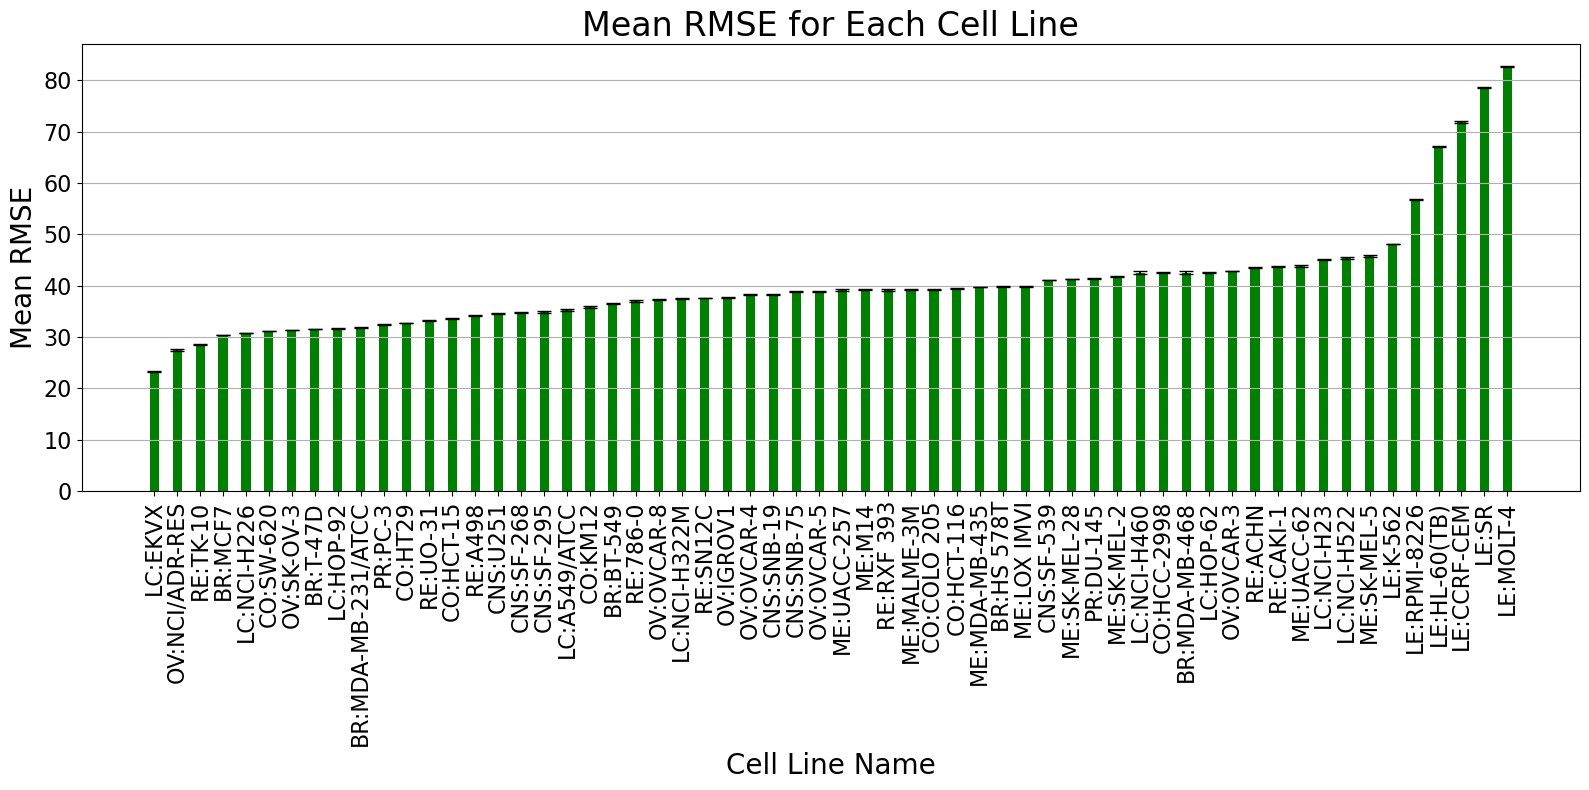

          CellLine  Mean_RMSE  Std_RMSE
7          LC:EKVX      23.36    0.0591
22  OV:NCI/ADR-RES      27.45    0.1922
42        RE:TK-10      28.62    0.1209
20         BR:MCF7      30.39    0.0522
24     LC:NCI-H226      30.85    0.0223
        CellLine  Mean_RMSE  Std_RMSE
29  LE:RPMI-8226      56.78    0.0978
11  LE:HL-60(TB)      67.14    0.1341
4    LE:CCRF-CEM      71.86    0.1867
36         LE:SR      78.52    0.1076
21     LE:MOLT-4      82.74    0.1046


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("rounded_rmse_results_TensorFlow.csv")

# Sort the DataFrame by 'Mean_RMSE' column in descending order
df = df.sort_values(by='Mean_RMSE', ascending=True)

# Define the width of the bars
bar_width = 0.4

# Calculate the position of each bar
positions = range(len(df['CellLine']))

# Plotting
plt.figure(figsize=(16, 8))
plt.bar(positions, df['Mean_RMSE'], width=bar_width, yerr=df['Std_RMSE'], capsize=5, color='green')
plt.xlabel('Cell Line Name', fontsize=20)
plt.ylabel('Mean RMSE', fontsize=20)
plt.title('Mean RMSE for Each Cell Line', fontsize=24)
plt.xticks(positions, df['CellLine'], rotation=90, fontsize=16)
plt.grid(axis='y')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

# # Save the figure as a PDF
# plt.savefig("Figure5.pdf")

print(df.sort_values(by='Mean_RMSE', ascending=True).head())
print(df.sort_values(by='Mean_RMSE', ascending=True).tail())

In [16]:
import pandas as pd

# Read the CSV files
df_auc = pd.read_csv("rounded_auc_results_TensorFlow.csv")
df_rmse = pd.read_csv("rounded_rmse_results_TensorFlow.csv")

# Concatenate based on the 'CellLine' column
df_concatenated = pd.merge(df_auc, df_rmse, on='CellLine')

# # Save the concatenated DataFrame to a new CSV file
# df_concatenated.to_csv("concatenated_results.csv", index=False)
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CellLine   60 non-null     object 
 1   Mean_AUC   60 non-null     float64
 2   Std_AUC    60 non-null     float64
 3   Mean_RMSE  60 non-null     float64
 4   Std_RMSE   60 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.8+ KB


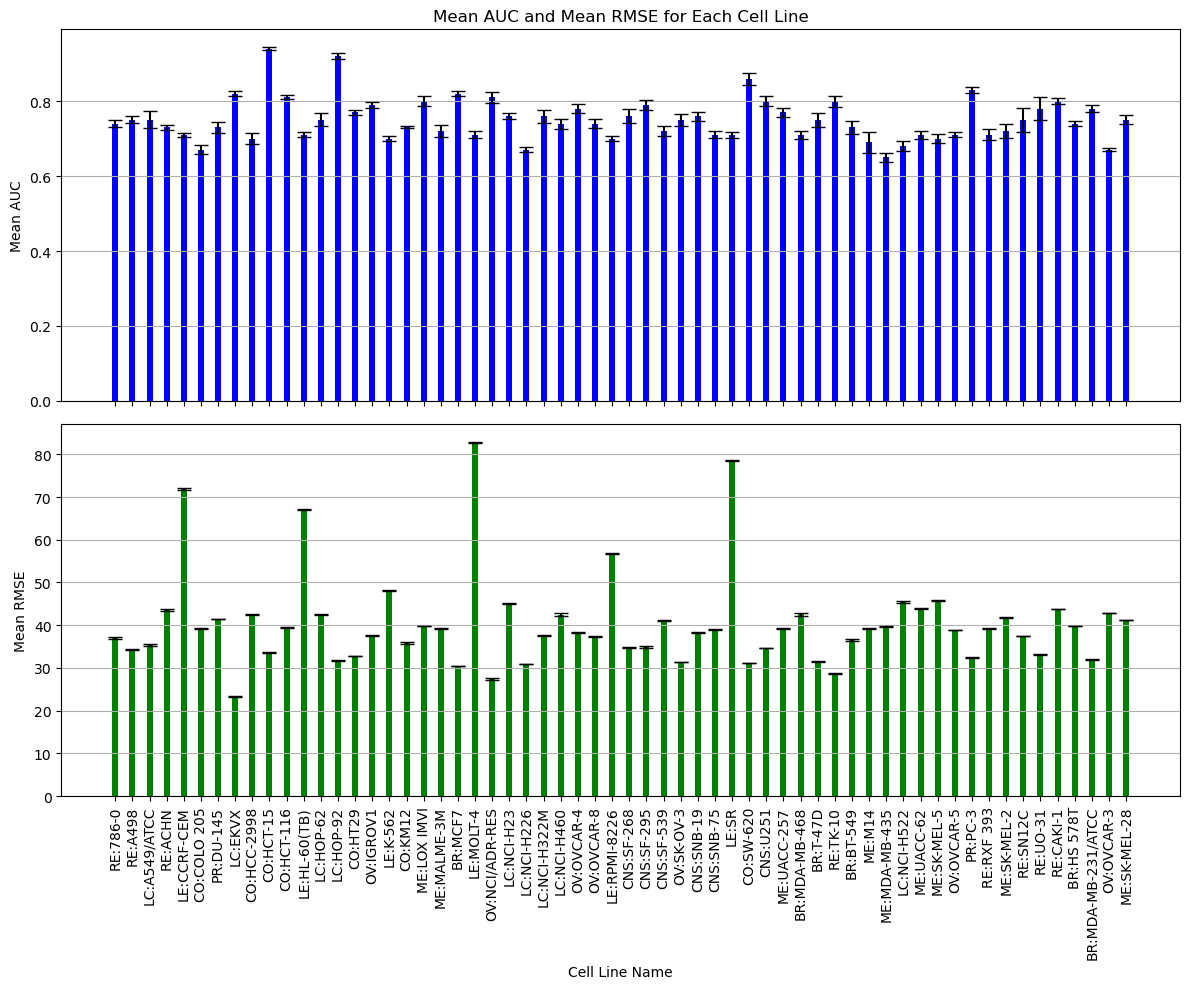

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# # Read the concatenated DataFrame
# df_concatenated = pd.read_csv("concatenated_results.csv")

# Define the width of the bars
bar_width = 0.35

# Calculate the position of each bar
positions = range(len(df_concatenated['CellLine']))

# Create a figure with two subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot bars for Mean AUC
ax1.bar(positions, df_concatenated['Mean_AUC'], width=bar_width, yerr=df_concatenated['Std_AUC'], capsize=5, label='Mean AUC', color='blue')
ax1.set_ylabel('Mean AUC')
ax1.set_title('Mean AUC and Mean RMSE for Each Cell Line')
ax1.grid(axis='y')

# Plot bars for Mean RMSE
ax2.bar(positions, df_concatenated['Mean_RMSE'], width=bar_width, yerr=df_concatenated['Std_RMSE'], capsize=5, label='Mean RMSE', color='green')
ax2.set_ylabel('Mean RMSE')
ax2.set_xlabel('Cell Line Name')
ax2.grid(axis='y')

# Set x-axis labels for both subplots
plt.xticks(positions, df_concatenated['CellLine'], rotation=90)

plt.tight_layout()
plt.show()


### Pie plot for cell lines:

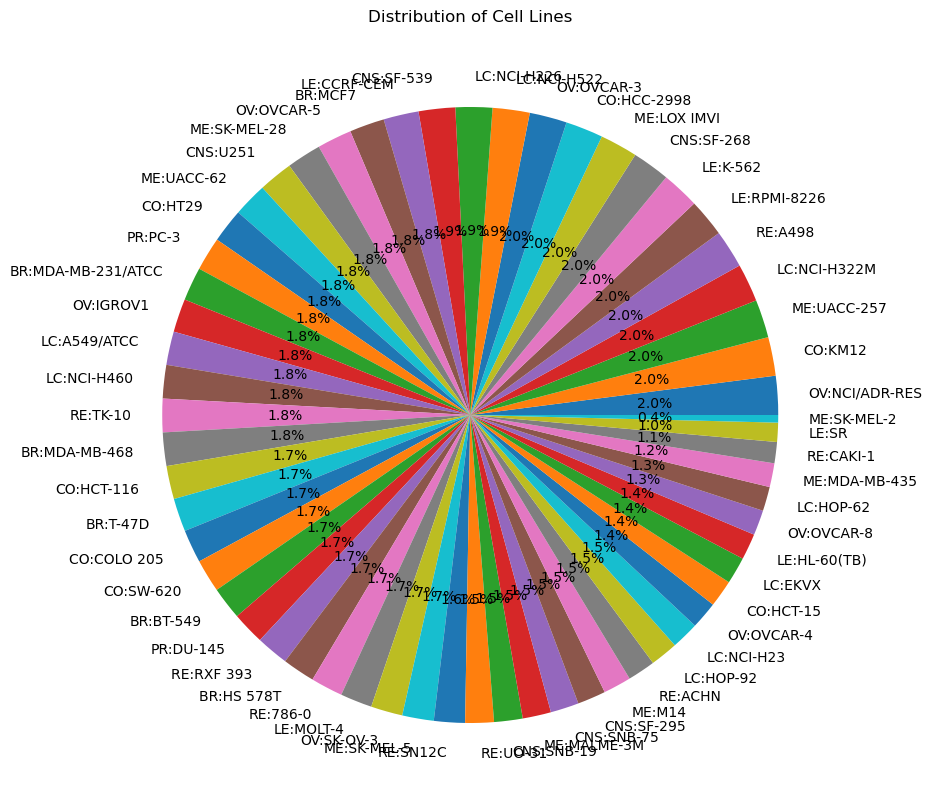

In [10]:
import matplotlib.pyplot as plt

# Data: combo_druggrowth_df['CELLLINENAME'].value_counts()
cell_line_counts = combo_druggrowth_df['CELLLINENAME'].value_counts()

# Get unique cell line names and their counts
cell_lines = cell_line_counts.index.tolist()
counts = cell_line_counts.values.tolist()

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=cell_lines, autopct='%1.1f%%')
plt.title('Distribution of Cell Lines')
plt.show()


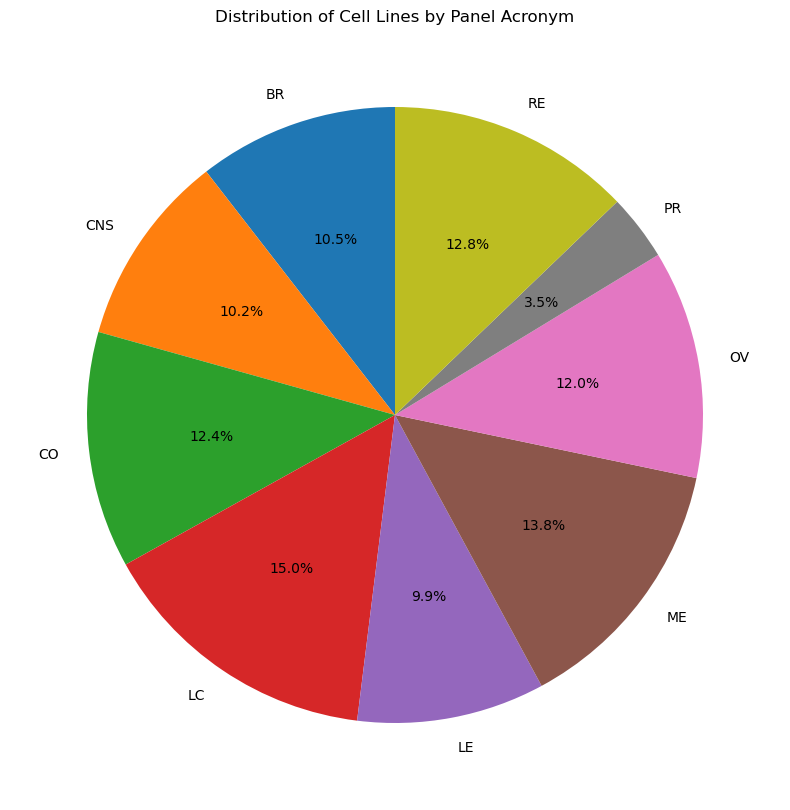

In [16]:
import matplotlib.pyplot as plt

# Group cell line names by panel acronyms
cell_line_groups = combo_druggrowth_df.groupby('PANELACRONYM')['CELLLINENAME'].count()

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(cell_line_groups, labels=cell_line_groups.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cell Lines by Panel Acronym')
plt.show()


In [38]:
import matplotlib.pyplot as plt

# Group cell line names by panel acronyms
cell_line_groups = combo_druggrowth_df.groupby('PANELACRONYM')['CELLLINENAME'].value_counts(normalize=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate over each panel acronym group
start_angle = 0
for panel, cell_lines in cell_line_groups.groupby(level=0):
    cell_line_counts = cell_lines.droplevel(0)
    ax.pie(cell_line_counts.values, 
           labels=cell_line_counts.index, 
           autopct='%1.1f%%', 
           startangle=start_angle)
    start_angle += 360 * len(cell_line_counts) / len(combo_druggrowth_df)

# Set title and legend
ax.set_title('Distribution of Cell Lines by Panel Acronym')
ax.legend(cell_line_groups.index.get_level_values(0).unique(), loc='upper right')

plt.show()


### Matrix Sparsity Calculation: